### XGBoost

In [2]:
pip install xgboost

                                              0.0/99.7 MB ? eta -:--:--
                                             0.0/99.7 MB 660.6 kB/s eta 0:02:31
                                             0.1/99.7 MB 787.7 kB/s eta 0:02:07
                                              0.2/99.7 MB 1.0 MB/s eta 0:01:38
                                              0.2/99.7 MB 1.0 MB/s eta 0:01:38
                                             0.2/99.7 MB 962.7 kB/s eta 0:01:44
                                              0.3/99.7 MB 1.0 MB/s eta 0:01:36
                                             0.3/99.7 MB 999.0 kB/s eta 0:01:40
                                              0.4/99.7 MB 1.1 MB/s eta 0:01:29
                                              0.4/99.7 MB 1.1 MB/s eta 0:01:29
                                              0.4/99.7 MB 1.1 MB/s eta 0:01:29
                                              0.4/99.7 MB 1.1 MB/s eta 0:01:29
                                             0.5/99.7 M


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4]	eval-rmse:71.80880	train-rmse:76.06532
[5]	eval-rmse:71.53908	train-rmse:75.70437
[6]	eval-rmse:71.25887	train-rmse:75.33864
[7]	eval-rmse:70.99426	train-rmse:74.97820
[8]	eval-rmse:70.73045	train-rmse:74.62795
[9]	eval-rmse:70.49050	train-rmse:74.28277
[10]	eval-rmse:70.24539	train-rmse:73.94244
[11]	eval-rmse:70.00295	train-rmse:73.60703
[12]	eval-rmse:69.76562	train-rmse:73.27638
[13]	eval-rmse:69.52100	train-rmse:72.94524
[14]	eval-rmse:69.27481	train-rmse:72.62546
[15]	eval-rmse:69.00998	train-rmse:72.30320
[16]	eval-rmse:68.78755	train-rmse:71.98529
[17]	eval-rmse:68.55737	train-rmse:71.66870
[18]	eval-rmse:68.30442	train-rmse:71.35914
[19]	eval-rmse:68.10443	train-rmse:71.05081
[20]	eval-rmse:67.88706	train-rmse:70.74940
[21]	eval-rmse:67.65367	train-rmse:70.45212
[22]	eval-rmse:67.42270	train-rmse:70.1555

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[170]	eval-rmse:53.77734	train-rmse:49.59699
[171]	eval-rmse:53.75859	train-rmse:49.54065
[172]	eval-rmse:53.73468	train-rmse:49.47972
[173]	eval-rmse:53.71326	train-rmse:49.41423
[174]	eval-rmse:53.69033	train-rmse:49.35646
[175]	eval-rmse:53.66638	train-rmse:49.26893
[176]	eval-rmse:53.62783	train-rmse:49.21674
[177]	eval-rmse:53.60791	train-rmse:49.15353
[178]	eval-rmse:53.59670	train-rmse:49.09465
[179]	eval-rmse:53.57044	train-rmse:49.03110
[180]	eval-rmse:53.55746	train-rmse:48.97898
[181]	eval-rmse:53.54453	train-rmse:48.91638
[182]	eval-rmse:53.52486	train-rmse:48.86272
[183]	eval-rmse:53.50724	train-rmse:48.77936
[184]	eval-rmse:53.51253	train-rmse:48.72872
[185]	eval-rmse:53.50072	train-rmse:48.66814
[186]	eval-rmse:53.47142	train-rmse:48.61501
[187]	eval-rmse:53.45296	train-rmse:48.56103
[188]	eval-rmse:53.42905	train-rmse:48.50967
[189]	eval-rmse:53.43544	train-rmse:48.46062
[190]	eval-rmse:53.45060	train-rmse:48.39667
[191]	eval-rmse:53.43356	train-rmse:48.34633
[192]	eval

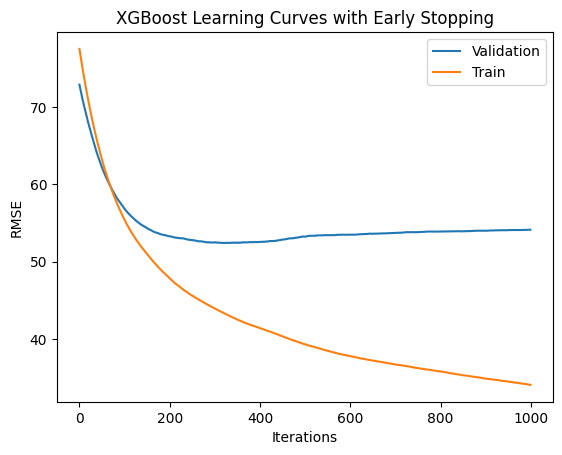

In [11]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data and split
data = load_diabetes()
X = data.data
y = data.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Parameters for XGBoost
param = {'max_depth': 3, 'eta': 0.01, 'objective': 'reg:squarederror'}

# Train the model with early stopping
num_round = 1000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]
evals_result = {}  # Initialize an empty dictionary to store results
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10, evals_result=evals_result)

# Plotting the learning curves
epochs = len(evals_result['eval']['rmse'])
x_axis = range(0, epochs)
plt.figure()    
plt.plot(x_axis, evals_result['eval']['rmse'], label='Validation')
plt.plot(x_axis, evals_result['train']['rmse'], label='Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.title('XGBoost Learning Curves with Early Stopping')
plt.show()



In [12]:
import pandas as pd
evals_result.keys()

dict_keys(['eval', 'train'])

In [13]:
results_df = pd.DataFrame([evals_result['eval']['rmse'],evals_result['train']['rmse']]).T

In [14]:
results_df['diff'] = results_df[0] - results_df[1]

In [15]:
results_df[results_df['diff'] < 0.01]

,0,1,diff
0,72.930889,77.563037,-4.632147
1,72.643776,77.180398,-4.536622
2,72.361093,76.803274,-4.442181
3,72.082784,76.431603,-4.348818
4,71.808797,76.065323,-4.256526
...,...,...,...
64,60.292083,60.532969,-0.240886
65,60.173519,60.360002,-0.186483
66,60.064582,60.194993,-0.130410
67,59.941553,60.024619,-0.083066


In [16]:
bst.best_ntree_limit = 67


In [17]:
predictions = bst.predict(dvalid)


In [18]:
predictions

array([159.18893 , 206.27591 , 175.22429 , 295.9157  , 125.61823 ,
       128.06154 , 257.15338 , 211.338   , 149.00725 , 154.41249 ,
       104.102036, 196.0869  ,  91.59793 , 239.47511 , 118.52005 ,
       111.4021  , 229.35774 , 256.7412  , 185.72925 , 235.24536 ,
       186.84236 ,  96.88423 ,  70.414986, 199.52876 , 152.07    ,
       187.21767 , 204.85905 , 196.00319 ,  72.606544, 108.55862 ,
       180.78674 , 118.76349 , 146.50636 , 183.84616 , 149.25348 ,
       187.11473 , 112.96919 , 114.76101 , 184.28674 ,  68.52865 ,
        67.98585 ,  83.91956 , 174.2202  , 185.96986 , 180.46988 ,
        79.47412 , 100.26168 , 112.16302 ,  73.11136 , 164.4933  ,
       124.60371 ,  82.27981 , 140.3247  , 100.12516 , 195.36021 ,
       146.1376  ,  96.57848 , 232.90302 ,  89.81601 ,  89.82054 ,
       174.07098 , 185.5151  , 127.16104 ,  85.30461 , 122.92981 ,
       234.15456 , 162.96346 , 181.43661 , 151.00249 , 112.90678 ,
       161.7822  , 192.78462 , 239.39641 ,  97.16356 ,  87.351

In [19]:
best_iteration = bst.best_iteration
print(f"Best iteration: {best_iteration}")

Best iteration: 999


### XGBoost with Additional Params

[0]	eval-rmse:72.97626	train-rmse:77.64333
[1]	eval-rmse:72.69876	train-rmse:77.25091
[2]	eval-rmse:72.39422	train-rmse:76.87543
[3]	eval-rmse:72.10529	train-rmse:76.53108
[4]	eval-rmse:71.78743	train-rmse:76.19417
[5]	eval-rmse:71.54003	train-rmse:75.85559
[6]	eval-rmse:71.33118	train-rmse:75.53465
[7]	eval-rmse:71.03714	train-rmse:75.18327
[8]	eval-rmse:70.74718	train-rmse:74.84929
[9]	eval-rmse:70.50991	train-rmse:74.51816
[10]	eval-rmse:70.25772	train-rmse:74.17669
[11]	eval-rmse:69.96266	train-rmse:73.82993
[12]	eval-rmse:69.78655	train-rmse:73.57031
[13]	eval-rmse:69.53775	train-rmse:73.24250
[14]	eval-rmse:69.27821	train-rmse:72.92102
[15]	eval-rmse:69.00558	train-rmse:72.58023
[16]	eval-rmse:68.74315	train-rmse:72.25847
[17]	eval-rmse:68.52118	train-rmse:72.00828


[18]	eval-rmse:68.28304	train-rmse:71.70222
[19]	eval-rmse:68.03956	train-rmse:71.40558
[20]	eval-rmse:67.78136	train-rmse:71.09433
[21]	eval-rmse:67.57993	train-rmse:70.79526
[22]	eval-rmse:67.33950	train-rmse:70.48165
[23]	eval-rmse:67.13044	train-rmse:70.19261
[24]	eval-rmse:66.94147	train-rmse:69.91275
[25]	eval-rmse:66.74554	train-rmse:69.63349
[26]	eval-rmse:66.53355	train-rmse:69.34226
[27]	eval-rmse:66.44354	train-rmse:69.11741
[28]	eval-rmse:66.24463	train-rmse:68.88889
[29]	eval-rmse:66.02816	train-rmse:68.60137
[30]	eval-rmse:65.87407	train-rmse:68.37813
[31]	eval-rmse:65.65067	train-rmse:68.11427
[32]	eval-rmse:65.47667	train-rmse:67.85870
[33]	eval-rmse:65.26293	train-rmse:67.59243
[34]	eval-rmse:65.03008	train-rmse:67.31815
[35]	eval-rmse:64.83127	train-rmse:67.07390
[36]	eval-rmse:64.64217	train-rmse:66.80991
[37]	eval-rmse:64.42535	train-rmse:66.57906
[38]	eval-rmse:64.28948	train-rmse:66.33973
[39]	eval-rmse:64.06993	train-rmse:66.07550
[40]	eval-rmse:63.92211	train-rm

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[177]	eval-rmse:53.80307	train-rmse:49.29183
[178]	eval-rmse:53.75819	train-rmse:49.22806
[179]	eval-rmse:53.71524	train-rmse:49.16325
[180]	eval-rmse:53.71534	train-rmse:49.10266
[181]	eval-rmse:53.70749	train-rmse:49.03855
[182]	eval-rmse:53.68931	train-rmse:48.97941
[183]	eval-rmse:53.65484	train-rmse:48.90929
[184]	eval-rmse:53.61999	train-rmse:48.85094
[185]	eval-rmse:53.59491	train-rmse:48.80708
[186]	eval-rmse:53.58237	train-rmse:48.75872
[187]	eval-rmse:53.56164	train-rmse:48.70269
[188]	eval-rmse:53.54181	train-rmse:48.64394
[189]	eval-rmse:53.51191	train-rmse:48.59283
[190]	eval-rmse:53.46832	train-rmse:48.51778
[191]	eval-rmse:53.45432	train-rmse:48.47169
[192]	eval-rmse:53.44981	train-rmse:48.41808
[193]	eval-rmse:53.41258	train-rmse:48.35841
[194]	eval-rmse:53.40225	train-rmse:48.30168
[195]	eval-rmse:53.37468	train-rmse:48.24982
[196]	eval-rmse:53.35982	train-rmse:48.19314
[197]	eval-rmse:53.32715	train-rmse:48.13088
[198]	eval-rmse:53.29850	train-rmse:48.07933
[199]	eval

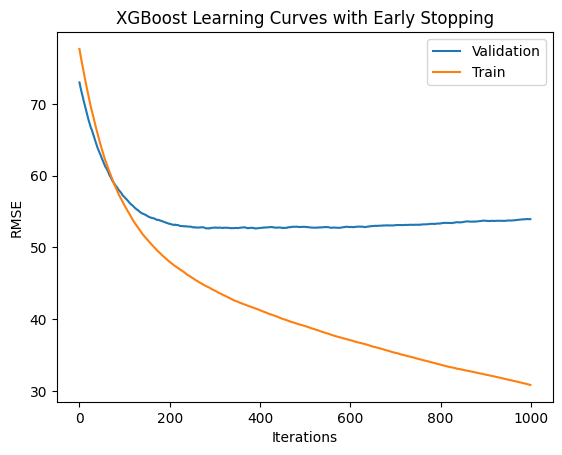

In [20]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data and split
data = load_diabetes()
X = data.data
y = data.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Parameters for XGBoost with added regularization and other hyperparameters
param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror',
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'alpha': 0.1,
    'lambda': 1
}

# Train the model with early stopping
num_round = 1000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]
evals_result = {}  # Initialize an empty dictionary to store results
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=50, evals_result=evals_result)

# Plotting the learning curves
epochs = len(evals_result['eval']['rmse'])
x_axis = range(0, epochs)
plt.figure()
plt.plot(x_axis, evals_result['eval']['rmse'], label='Validation')
plt.plot(x_axis, evals_result['train']['rmse'], label='Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.title('XGBoost Learning Curves with Early Stopping')
plt.show()


### Custom Early Stopping

[0]	eval-rmse:72.93089	train-rmse:77.56304
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4]	eval-rmse:71.80880	train-rmse:76.06532
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4]	eval-rmse:71.80880	train-rmse:76.06532
[5]	eval-rmse:71.53908	train-rmse:75.70437
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rm

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[16]	eval-rmse:68.78755	train-rmse:71.98529
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4]	eval-rmse:71.80880	train-rmse:76.06532
[5]	eval-rmse:71.53908	train-rmse:75.70437
[6]	eval-rmse:71.25887	train-rmse:75.33864
[7]	eval-rmse:70.99426	train-rmse:74.97820
[8]	eval-rmse:70.73045	train-rmse:74.62795
[9]	eval-rmse:70.49050	train-rmse:74.28277
[10]	eval-rmse:70.24539	train-rmse:73.94244
[11]	eval-rmse:70.00295	train-rmse:73.60703
[12]	eval-rmse:69.76562	train-rmse:73.27638
[13]	eval-rmse:69.52100	train-rmse:72.94524
[14]	eval-rmse:69.27481	train-rmse:72.62546
[15]	eval-rmse:69.00998	train-rmse:72.30320
[16]	eval-rmse:68.78755	train-rmse:71.98529
[17]	eval-rmse:68.55737	train-rmse:71.66870
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4

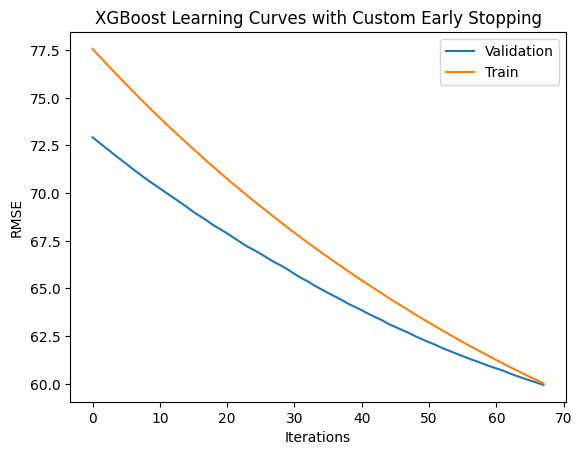

In [21]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data and split
data = load_diabetes()
X = data.data
y = data.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Parameters for XGBoost
param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror'
}

num_round = 1000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]
evals_result = {}
threshold_difference = 0.1  # example threshold

for i in range(1, num_round + 1):
    bst = xgb.train(param, dtrain, i, evallist, evals_result=evals_result)
    diff = abs(evals_result['train']['rmse'][-1] - evals_result['eval']['rmse'][-1])
    
    if diff < threshold_difference:
        print(f"Stopping early at iteration {i} due to difference of {diff:.2f} between train-rmse and eval-rmse.")
        break

# Plotting the learning curves
epochs = len(evals_result['eval']['rmse'])
x_axis = range(0, epochs)
plt.figure()
plt.plot(x_axis, evals_result['eval']['rmse'], label='Validation')
plt.plot(x_axis, evals_result['train']['rmse'], label='Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.title('XGBoost Learning Curves with Custom Early Stopping')
plt.show()


More effective, stop the boosting at some point

LightGBM example

In [22]:
!brew install libomp


'brew' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### LIGHT GBM

In [24]:
import lightgbm as lgb

In [26]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt

# Load data
data = load_diabetes()
X = data.data
y = data.target

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the datasets for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# Define the parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1
}

# Train the model with early stopping
num_round = 1000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]
evals_result = {}  # Initialize an empty dictionary to store results
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10, evals_result=evals_result)

# Predict on the validation set
y_pred = bst.predict(X_valid, num_iteration=bst.best_iteration)

# Calculate RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE on validation set: {rmse:.2f}")





AttributeError: `best_iteration` is only defined when early stopping is used.

In [18]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train and evaluate a model
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00         1

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)
